## LEARNING OUTCOMES
### A big part of what you will need to do in a numerical calculation is to calculate a quantity (lets say $x$) as a function of another quantity (lets say $t$) and store the array $x(t)$ somewhere. Furthermore, you need to plot $t$ versus $x(t)$ so that we can understand the patterns we wish to study. 

### We have done the basic plotting already. In this class, we will see how to make such plots a bit pretty, how to save the plots you make, and also save a limited animation as a .gif file.

## We will begin with the task of storing the result of a calculation for future recall.  The following four builtin commands in numpy exits, namely np.save, np.savetxt, np.savez and np.savez_compressed. Lets look at them.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

You can lookup what np.save does by using the following command. Enable "scrollable element" to see the whole documentation, including an example.

In [3]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the filename if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obje

Study this documentation and familiarize yourself with it. The rest of this notebook is interesting code snippets and things for you to do. 

Note that often you will go to websites such as [this](https://journals.aps.org/authors/style-basics#tables) to look for submission guidelines on figures that will go into your publications 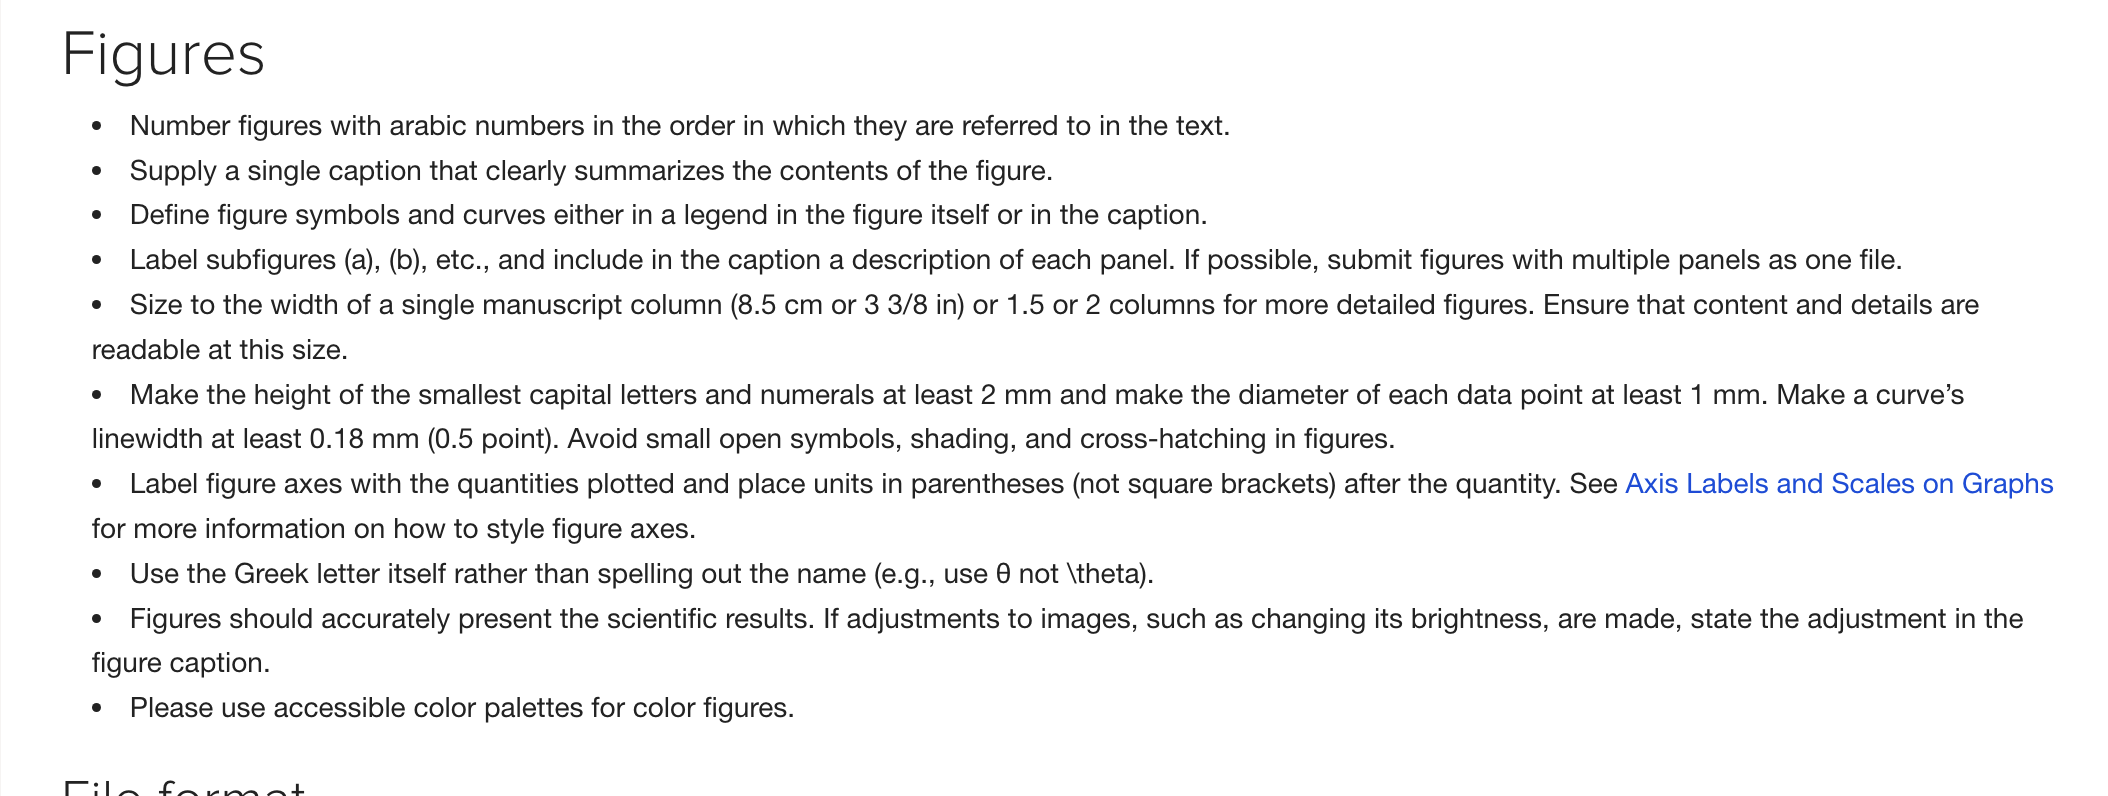

Complying with these size, width and font requirements requires you to know what to manipulate. See the following simple code

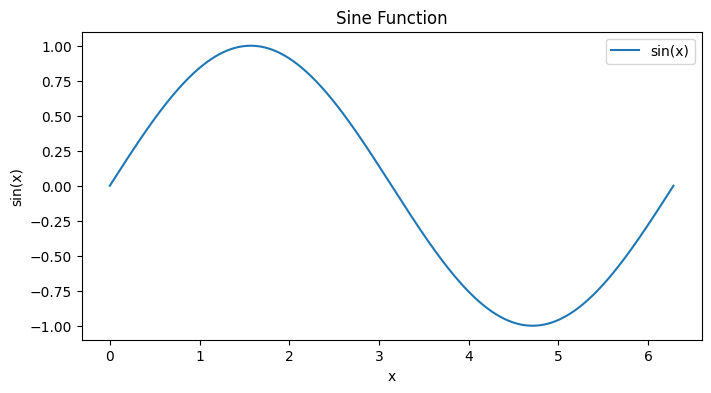

In [4]:


# Define the sine function
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Plot the sine function
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)')
plt.title('Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()

# Save the plot
plt.savefig('sine_function_plot.png')

# Show the plot
plt.show()

Once more, you can ask plt.title? to get documentation

In [5]:
plt.title?

Signature: plt.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
Docstring:
Set a title for the Axes.

Set one of the three available Axes titles. The available titles
are positioned above the Axes in the center, flush with the left
edge, and flush with the right edge.

Parameters
----------
label : str
    Text to use for the title

fontdict : dict
    A dictionary controlling the appearance of the title text,
    the default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'color': rcParams['axes.titlecolor'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
    Which title to set.

y : float, default: :rc:`axes.titley`
    Vertical Axes location for the title (1.0 is the top).  If
    None (the default) and :rc:`axes.titley` is also None, y is
    determined automatically to avoid decorators o

Notice font size is something you can manipulate. Usually we use the following code snippet, which will globally modify the font to the specification.

In [56]:

# Define the parameters globally 
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.family': 'serif'})


# Task to do: Consider the ODE solver for the equation $\ddot{x}+\sin(x)=0$, given below.

In [91]:
def deriv(u, t, omega_squared):
    "Provides derivative of vector u."
    xdot, x = u
    return [-omega_squared * np.sin(x), xdot]

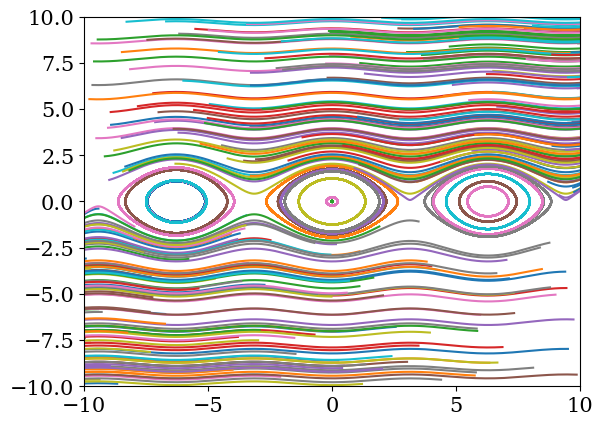

In [92]:
from scipy.integrate import odeint
for i in range(250):
    y0 = [-10+20*np.random.rand(), -10+20*np.random.rand()]
    snapshot_dt = 1e-2
    ts = np.arange(-100, 100, snapshot_dt)
    scipysol = odeint(deriv, y0, ts, args=(1,))
    plt.plot(scipysol[:, 1],scipysol[:, 0])
    plt.xlim(-10,10)
    plt.ylim(-10,10)


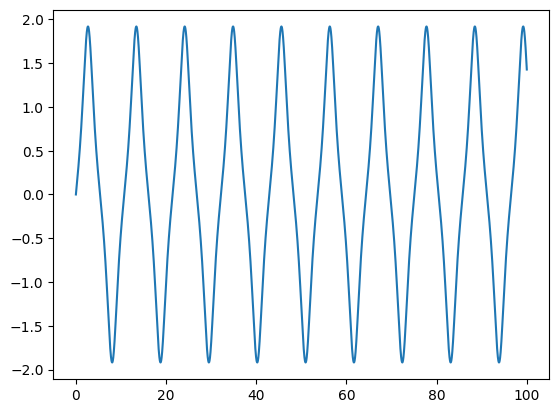

In [52]:
plt.plot(ts, scipysol[:, 0])

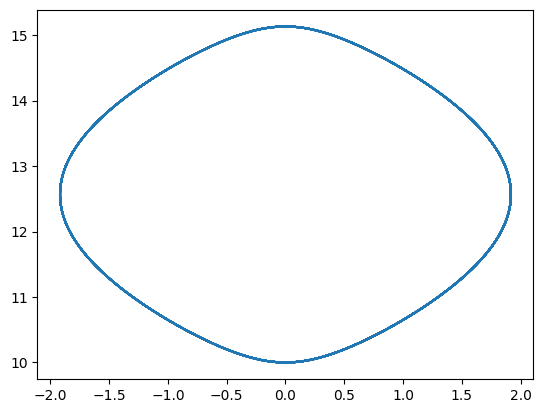

In [51]:
plt.plot(scipysol[:, 0],scipysol[:, 1])

# Sometimes we want to draw SEVERAL different plots all on the same plot. Here is an example of plotting $t,\sin(\omega t)$ for five increasing values of the frequency $\omega$. You can do this by simply running a FOR loop in the plot before the show() command. 

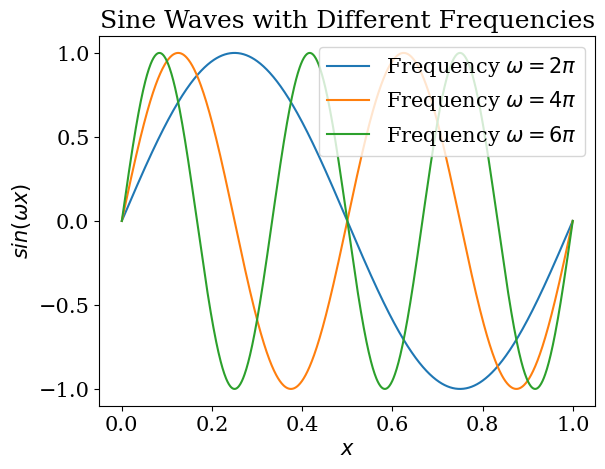

In [71]:
x = np.linspace(0, 1, 1000)
for i in range(1,4):
    y = np.sin(2*np.pi*i*x)
    plt.plot(x,y, label=fr'Frequency $\omega = {2*i}\pi $')
plt.legend()
plt.title('Sine Waves with Different Frequencies')
plt.xlabel('$x$')
plt.ylabel(r'$sin(\omega x)$')
plt.show()

# Make a plot of $x(t)$ vs $p(t)$, where you choose initial conditions randomly on the 2D plane. You should recover a known phase diagram.

You should see something like this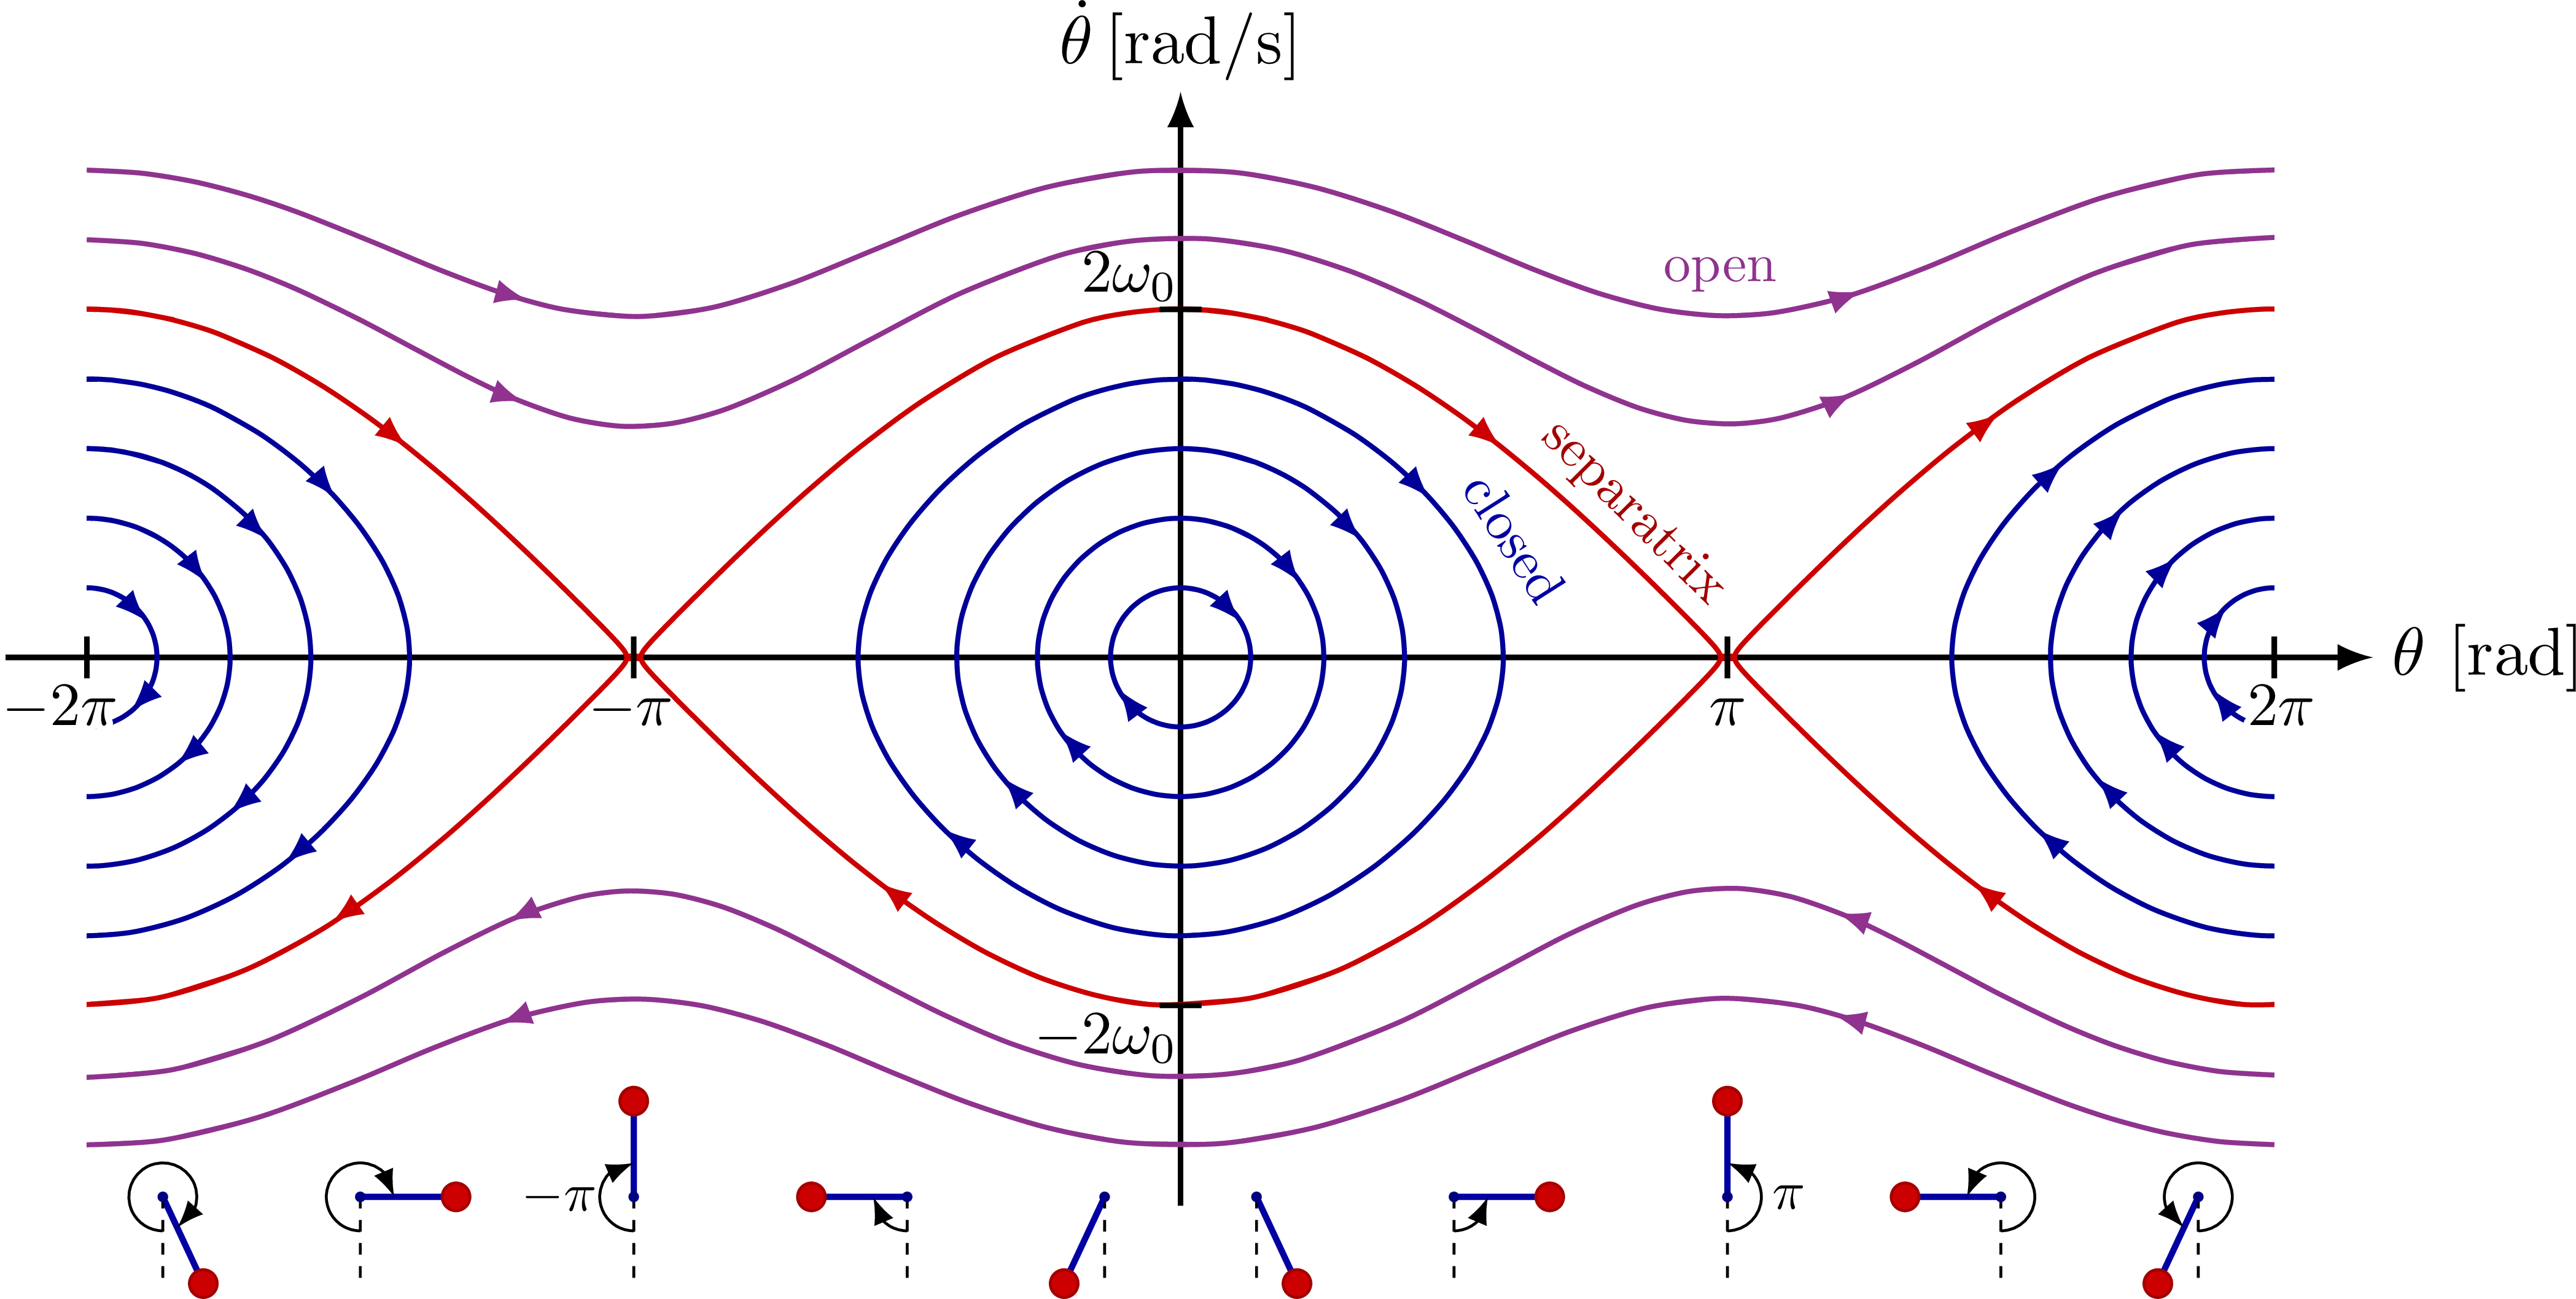

You can also make animations and save them in python. Here is a simple example.

MovieWriter imagemagick unavailable; using Pillow instead.


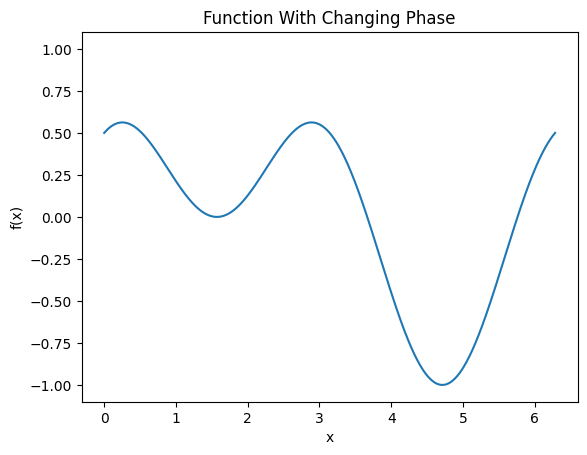

In [53]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the sine function with varying phase
def function(x, phase):
    return (np.sin(x + phase) + np.cos(2 * x + phase))/2

# Create a figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, y)

# Create a title and labels
plt.title('Function With Changing Phase')
plt.xlabel('x')
plt.ylabel('f(x)')


# Set up the plot limits
# ax.set_xlim(0, 2 * np.pi)
# ax.set_ylim(-1, 1)

# Update function for the animation
def update(phase):
    line.set_ydata(function(x, phase))
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 60), blit=True)

# Save the animation as a GIF
ani.save('Phase_changing_animation.gif', writer='imagemagick')

# Display the plot
plt.show()


We can furthermore, plot 2 dimensional plots representing three dimensions. Here z(x,y) is plotted as a color instead of height, and is a common data visualisation format. See the two codes, one which uses discrete buckets and another continuous. This will prove very useful in your physics coding.

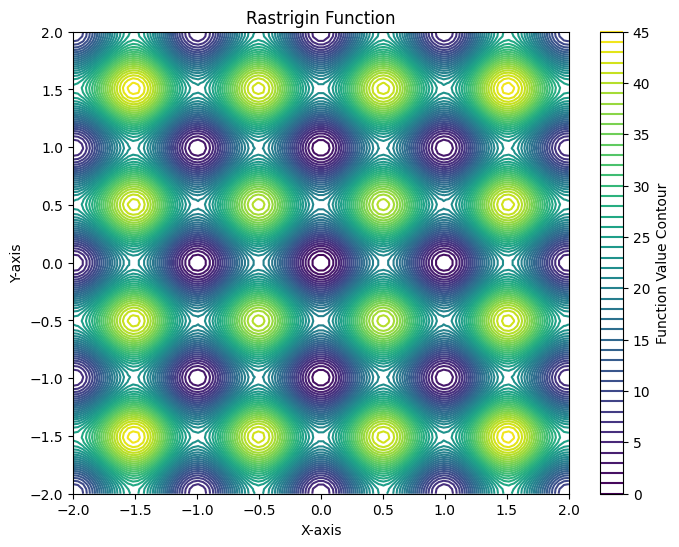

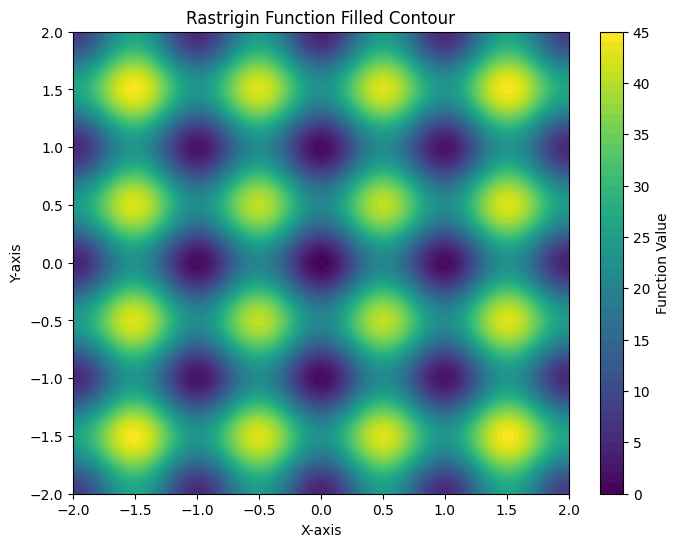

In [55]:
import numpy as np

import matplotlib.pyplot as plt

# Define the Rastrigin function
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Generating data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
# Compute the Rastrigin function values
Z_rastrigin = rastrigin(X, Y)

# Plot the Rastrigin function - using contour plot
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z_rastrigin, levels=50, cmap='viridis')
plt.colorbar(label='Function Value Contour')
plt.title('Rastrigin Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# Plot the Rastrigin function - using filled contour plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z_rastrigin, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.title('Rastrigin Function Filled Contour')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# SAVING DATA

### Lets see how to save data. Let us begin by considering the following code to simulate a random walk

In [1]:
# Definging the fucntion to simulate random walking with p_right as probablity of moving right
def Random_walk(p_right,n_steps=100):
    position = [0]
    for i in range(n_steps):
        step = 1 if np.random.rand() < p_right else -1
        position.append(position[i]+step)
    return np.array(position)


Below, we are simulating this random walk.

In [5]:
# Simulatind the random walk and generating the data
data1 = Random_walk(p_right = 0.1) #with p_right = 0.1
data2 = Random_walk(p_right = 0.7) #with p_right = 0.7

Then we save the data

In [6]:
# Saving the data
np.save('random_walk1.npy', data1)
np.save('random_walk2.npy', data2)


Go check that these two files are in your local folder

Lets now re-load them. Clear your kernel and reload np and plt

In [7]:
# Loading the previously saved data
loaded_data1 = np.load('random_walk1.npy')
loaded_data2 = np.load('random_walk2.npy')


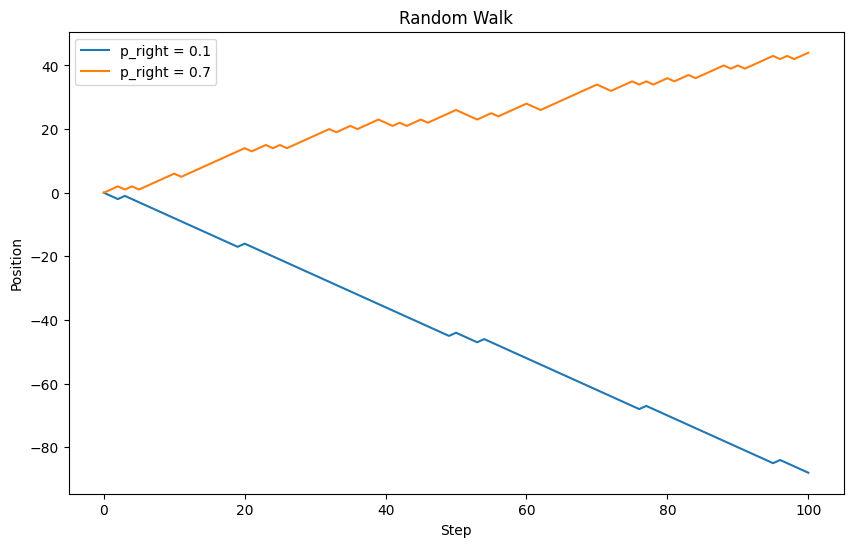

In [8]:
# Ploting
plt.figure(figsize=(10, 6))
plt.plot(loaded_data1, label='p_right = 0.1')
plt.plot(loaded_data2, label='p_right = 0.7')
plt.title('Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.legend()
plt.show()

# EXERCISE: 
## [1] Make a code that random walks uniformly in both directions. Plot and show.

## [2] Make a code that random walks in 2D plane. Plot 500 trajectories (restarted independant random walks) for 1000 steps and also plot one of them as a gif.